# Machine Learning and AI for Autonomous Systems
## A program by IISc and TalentSprint
### Assignment : Monte Carlo Method part-2

## Learning Objectives

At the end of the experiment, you will be able to

* Understand the difference between Model bassed and Model free environment.
* Understand the Monte carlo method.
* Application of Monte carlo method in Blackjack environment.

### Monte Carlo Methods in reinforcement learning

Monte Carlo methods are a class of reinforcement learning algorithms that learn directly from episodes of experience without any prior knowledge of the environment's dynamics. Monte Carlo methods are **episodic**, meaning that they can only be applied to tasks that have a beginning and an end.

The basic idea behind Monte Carlo methods is to estimate the value of a state or state-action pair by averaging the returns of all episodes that start in that state or state-action pair. The return of an episode is the sum of all the rewards the agent receives during the episode.

Here is a simple Monte Carlo algorithm for estimating the value of a state:

1. Start in the state whose value you want to estimate.
2. Take an action and observe the reward and next state.
3. Repeat steps 2 and 3 until the episode terminates.
4. Calculate the return of the episode.
5. Update the state's value estimate by averaging the return of the episode with the state's current value estimate.

This algorithm can be used to estimate the value of a state-action pair by starting in the state and taking the action in question.

Monte Carlo methods are simple and effective, but they have a few drawbacks. First, they can be slow to learn, especially for tasks with many states and actions. Second, they can be unstable, meaning that their estimates can fluctuate significantly from episode to episode.

Despite their drawbacks, Monte Carlo methods are a powerful tool for reinforcement learning. They are particularly useful for tasks where it is difficult or impossible to learn a model of the environment's dynamics.

**Applications of Monte Carlo Methods in Reinforcement Learning**

Monte Carlo methods have been used to solve a wide variety of reinforcement learning problems, including:

* Game playing
* Robotics
* Finance
* Manufacturing
* Healthcare

Here are a few examples:

* **Game playing:** Monte Carlo methods have been used to train agents to play games such as chess, Go, and Atari games.
* **Robotics:** Monte Carlo methods have been used to train robots to perform tasks such as walking, grasping objects, and navigating complex environments.
* **Finance:** Monte Carlo methods have been used to develop trading strategies and to assess the risk of financial assets.
* **Manufacturing:** Monte Carlo methods have been used to optimize production schedules and to improve the quality of manufactured products.
* **Healthcare:** Monte Carlo methods have been used to develop treatment plans for patients and to predict the spread of diseases.

**Conclusion**

Monte Carlo methods are a powerful tool for reinforcement learning. They are simple and effective, but they can be slow to learn and unstable. Monte Carlo methods have been used to solve a wide variety of reinforcement learning problems, including game playing, robotics, finance, manufacturing, and healthcare.

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2302794" #@param {type:"string"}

In [2]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "9008710123" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "AIAS_B2_M4_AST_02_Monte_Carlo_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aias-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing Libraries and Packages

In [4]:
import sys
import gym
import numpy as np
from collections import defaultdict
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


### OpenAI Gym Blackjack environment

The OpenAI Gym Blackjack environment is a reinforcement learning environment in which an agent learns to play the game of Blackjack by playing against a dealer. The agent's goal is to beat the dealer by obtaining cards that sum to closer to 21 (without going over 21) than the dealer's cards.

The Blackjack environment is a **text-based** environment, meaning that the agent observes the state of the environment as a sequence of text tokens. The state of the environment consists of the following information:

* The player's current sum
* The value of the dealer's one showing card
* Whether the player holds a usable ace

The agent can take two actions:

* **Hit:** Request another card
* **Stick:** Stop taking cards

The episode terminates when either the player or the dealer busts (goes over 21) or when both players stick. The agent's reward is +1 if the agent wins the hand, -1 if the agent loses the hand, and 0 if the hand is a draw.

The Blackjack environment is a challenging environment for reinforcement learning agents because it is a **stochastic** environment, meaning that the outcome of each action is not deterministic. For example, if the agent hits, there is a chance that they will receive a card that will bust them.

In [5]:
# Create an instance of Blacjack environment
env = gym.make('Blackjack-v1')

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [6]:
# Get the state space and action space
print("State Space: ", env.observation_space, "\n")
print("Action Space: ", env.action_space)

State Space:  Tuple(Discrete(32), Discrete(11), Discrete(2)) 

Action Space:  Discrete(2)


More information about the executed code in above:

1. Each state is a 3-tuple of:
    - the player's current sum  \{0, 1, . . ., 31\},
    - the dealer's face up card  \{1, . . ., 10\}, and
    - whether or not the player has a usable ace (`no` =0, `yes` =1).

<br>

2. The agent has two potential actions:

    - STICK = 0
    - HIT = 1

In [7]:
### Play blackjack with random policy (The code plays 3 times. Feel free to change this number.)

# Playing the game for 3 times
for i_episode in range(10):

    # Resets the state of the environment and returns an initial observation
    state = env.reset()

    # Infinite loop
    while True:

        # Print the state
        print("Current State: ", state)

        # Uniformly randomly sample a action
        action = env.action_space.sample()

        # Run the one timestep of the environment's dynamics.
        state, reward, done, info = env.step(action)

        # If done then print the reward and a message indication of winning or losing
        if done:
            print('Game ended! Reward: ', reward)
            print('You won :)') if reward > 0 else print('You lost :(')
            print("---------------------------------------")
            break

Current State:  (18, 7, False)
Game ended! Reward:  1.0
You won :)
---------------------------------------
Current State:  (12, 3, False)
Game ended! Reward:  -1.0
You lost :(
---------------------------------------
Current State:  (13, 8, False)
Game ended! Reward:  -1.0
You lost :(
---------------------------------------
Current State:  (18, 5, False)
Game ended! Reward:  1.0
You won :)
---------------------------------------
Current State:  (19, 3, False)
Current State:  (21, 3, False)
Game ended! Reward:  -1.0
You lost :(
---------------------------------------
Current State:  (15, 4, False)
Game ended! Reward:  -1.0
You lost :(
---------------------------------------
Current State:  (16, 5, False)
Game ended! Reward:  1.0
You won :)
---------------------------------------
Current State:  (19, 10, False)
Game ended! Reward:  -1.0
You lost :(
---------------------------------------
Current State:  (10, 4, False)
Game ended! Reward:  1.0
You won :)
-----------------------------------

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):




###  MC Prediction: State Values



In this section, you can write your own implementation of MC prediction (for estimating the state-value function).

We will begin by investigating a policy where the player always sticks if the sum of her cards exceeds 18.  The function `generate_episode_from_limit` samples an episode using this policy.

In [8]:
def generate_episode_from_limit(bj_env):
    """
    Generate episode.

    ARGUMENTS
    --------------------
        - bj_env: This is an instance of OpenAI Gym's Blackjack environment.

    RETURNS
    --------------------
        - episode: This is a list of (state, action, reward) tuples (of tuples) and corresponds to
                   (𝑆0,𝐴0,𝑅1,…,𝑆𝑇−1,𝐴𝑇−1,𝑅𝑇) , where  𝑇  is the final time step. In particular,
                   episode[i] returns  (𝑆𝑖,𝐴𝑖,𝑅𝑖+1) , and episode[i][0], episode[i][1], and episode[i][2]
                   return  𝑆𝑖, 𝐴𝑖, and  𝑅𝑖+1 , respectively.

    """
    # Initialize an empty array for episodes
    episode = []

    # Resets the state of the environment and returns an initial observation
    state = bj_env.reset()

    # Infinite loop
    while True:

        # Choose action;
        #     - Player choose the action STICK, if the sum of his cards is greater than 18
        #     - Player choose the action HIT, if the sum of his cards are 18 or below
        action = 0 if state[0] > 18 else 1

        # Run the one timestep of the environment's dynamics
        next_state, reward, done, info = bj_env.step(action)

        # Append S,A,R to episode
        episode.append((state, action, reward))

        # Update the current state to the next state
        state = next_state

        # If done then break the loop
        if done:
            break

    return episode

Execute the code cell below to play Blackjack with the policy.

(*The code currently plays Blackjack three times - feel free to change this number, or to run the cell multiple times.  The cell is designed for you to gain some familiarity with the output of the `generate_episode_from_limit` function.*)

In [9]:
### play Blackjack with the policy; The agent plays Blackjack 3 times. feel free to change this number

# Loop 3 times
for i in range(10):

    # Generate the episodes (state, action, reward)
    print(generate_episode_from_limit(env))

[((20, 3, False), 0, 1.0)]
[((18, 9, False), 1, -1.0)]
[((14, 10, False), 1, 0.0), ((17, 10, False), 1, -1.0)]
[((13, 4, True), 1, 0.0), ((19, 4, True), 0, 1.0)]
[((20, 5, False), 0, -1.0)]
[((19, 2, False), 0, 1.0)]
[((11, 10, False), 1, 0.0), ((13, 10, False), 1, 0.0), ((14, 10, False), 1, 0.0), ((17, 10, False), 1, -1.0)]
[((11, 8, False), 1, 0.0), ((21, 8, False), 0, 0.0)]
[((13, 10, False), 1, 0.0), ((16, 10, False), 1, -1.0)]
[((6, 5, False), 1, 0.0), ((10, 5, False), 1, 0.0), ((20, 5, False), 0, 0.0)]


Now, you are ready to write your own implementation of MC prediction.  Feel free to implement either first-visit or every-visit MC prediction; in the case of the Blackjack environment, the techniques are equivalent.

The pseudocode for (first-visit) MC prediction (for the state values) can be found below.

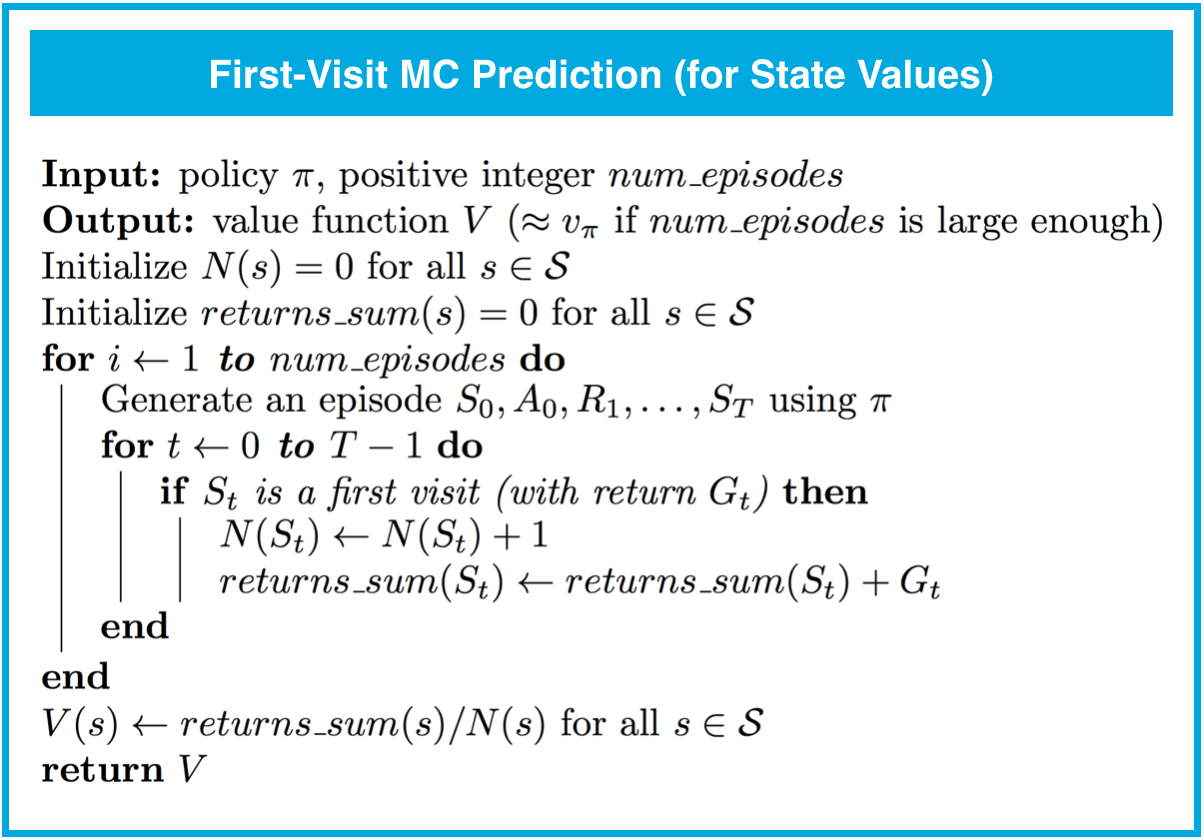

If you are unfamiliar with how to use `defaultdict` in Python, you are encouraged to check out [this source](https://www.accelebrate.com/blog/using-defaultdict-python/).

In [10]:
def mc_prediction_v(env, num_episodes, generate_episode, gamma=1.0):
    """
    Implementation of MC Prediction State Values.

    ARGUMENTS
    -------------------
        - env: This is an instance of an OpenAI Gym environment.
        - num_episodes: This is the number of episodes that are generated through agent-environment interaction.
        - generate_episode: This is a function that returns an episode of interaction.
        - gamma: This is the discount rate. It must be a value between 0 and 1, inclusive (default value: 1).


    RETURNS
    -------------------
        - V: This is a dictionary where V[s] is the estimated value of state s.
             For example, if your code returns the following output:
             {(4, 7, False): -0.38775510204081631,
              (18, 6, False): -0.58434296365330851,
              (13, 2, False): -0.43409090909090908,
              (6, 7, False): -0.3783783783783784, ...
             then the value of state (4, 7, False) was estimated to be -0.38775510204081631.
    """
    # Initialize empty dictionary of lists
    returns = defaultdict(list)

    # Loop over episodes
    for i_episode in range(1, num_episodes+1):

        # Print the episodes
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()

        # Generate an episode
        episode = generate_episode(env)

        # Obtain the states, actions, and rewards
        states, actions, rewards = zip(*episode)

        # Prepare for discounting
        discounts = np.array([gamma**i for i in range(len(rewards)+1)])

        # Iterate through each states
        for i, state in enumerate(states):

            # Store the return for each visit in the episode
            returns[state].append(sum(rewards[i:]*discounts[:-(1+i)]))

    # Calculate the state-value function estimate
    V = {k: np.mean(v) for k, v in returns.items()}

    return V

#### Predict the MC and plot it

In [11]:
def plot_blackjack_values(V):

    def get_Z(x, y, usable_ace):
        if (x,y,usable_ace) in V:
            return V[x,y,usable_ace]
        else:
            return 0

    def get_figure(usable_ace, ax):
        x_range = np.arange(11, 22)
        y_range = np.arange(1, 11)
        X, Y = np.meshgrid(x_range, y_range)

        Z = np.array([get_Z(x,y,usable_ace) for x,y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

        surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm, vmin=-1.0, vmax=1.0)
        ax.set_xlabel('Player\'s Current Sum')
        ax.set_ylabel('Dealer\'s Showing Card')
        ax.set_zlabel('State Value')
        ax.view_init(ax.elev, -120)

    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(211, projection='3d')
    ax.set_title('Usable Ace')
    get_figure(True, ax)
    ax = fig.add_subplot(212, projection='3d')
    ax.set_title('No Usable Ace')
    get_figure(False, ax)
    plt.show()

Episode 500000/500000.

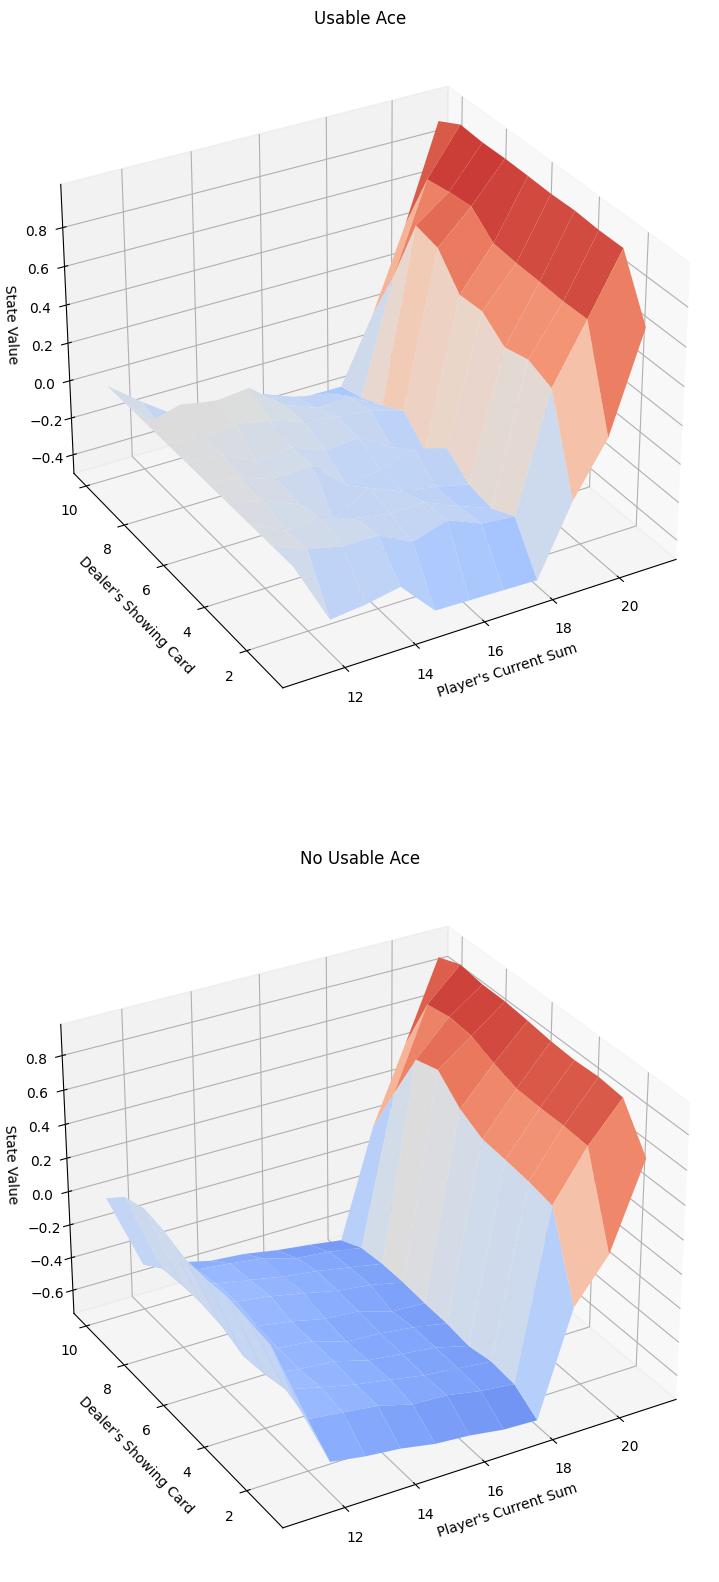

In [12]:
# Get the value function
V = mc_prediction_v(env, 500000, generate_episode_from_limit)

# plot the value function
plot_blackjack_values(V)

<br>

# 3. MC Prediction: Action Values

<hr>

In this section, you will write your own implementation of MC prediction (for estimating the action-value function).  

We will begin by investigating a policy where the player _almost_ always sticks if the sum of her cards exceeds 18.  In particular, she selects action `STICK` with 80% probability if the sum is greater than 18; and, if the sum is 18 or below, she selects action `HIT` with 80% probability.  The function `generate_episode_from_limit_stochastic` samples an episode using this policy.

The pseudocode for (first-visit) MC prediction (for the action values) can be found below:

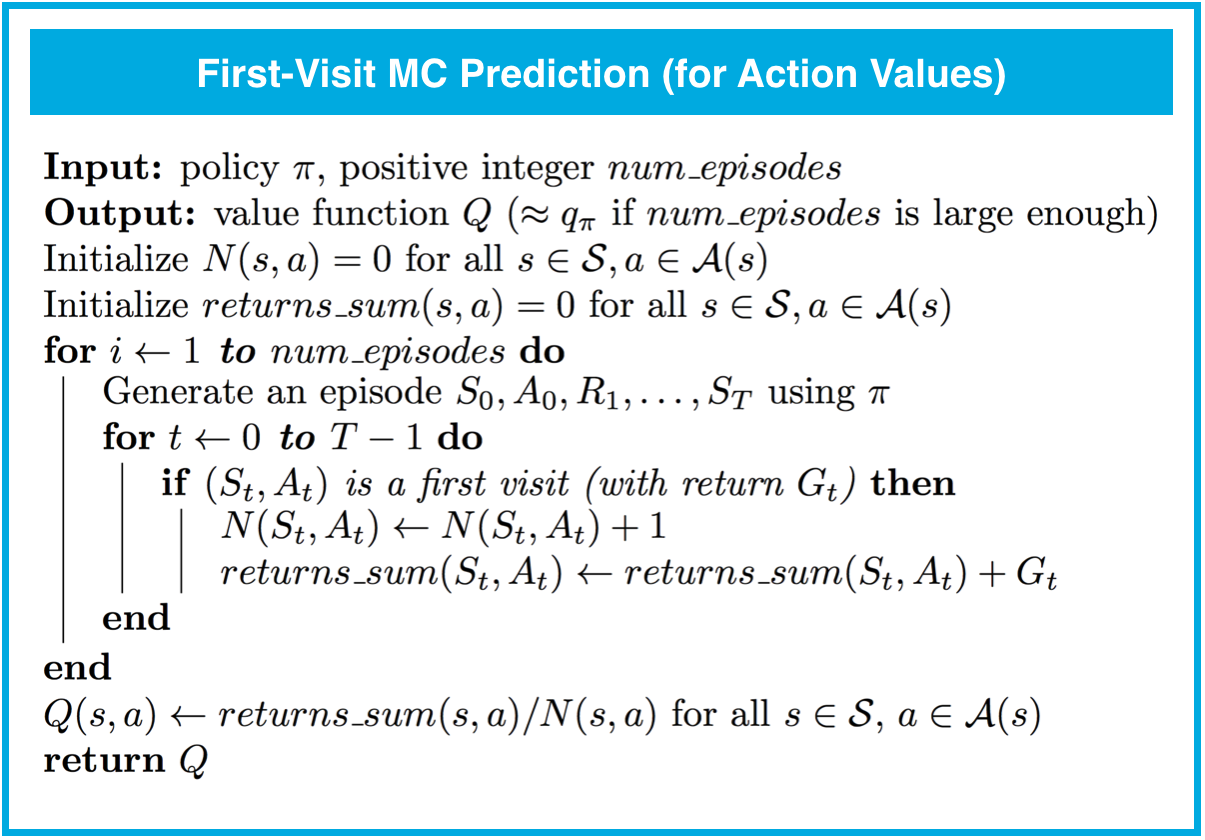

In [13]:
def generate_episode_from_limit_stochastic(bj_env):
    """
    Generating episode.

    ARGUMENTS
    ------------------
    - bj_env: This is an instance of OpenAI Gym's Blackjack environment.

    RETURNS
    ------------------
    - episode: This is a list of (state, action, reward) tuples (of tuples) and corresponds
               to (𝑆0,𝐴0,𝑅1,…,𝑆𝑇−1,𝐴𝑇−1,𝑅𝑇) , where  𝑇  is the final time step. In particular,
               episode[i] returns  (𝑆𝑖,𝐴𝑖,𝑅𝑖+1) , and episode[i][0], episode[i][1], and episode[i][2]
               return  𝑆𝑖 ,  𝐴𝑖 , and  𝑅𝑖+1 , respectively.
    """
    # Initialize an empty array for episodes
    episode = []

    # Resets the state of the environment and returns an initial observation
    state = bj_env.reset()

    # Infinite loop
    while True:

        # Defining the probabilities:
        #     - The agent selects action STICK with 80% probability if the sum is greater than 18.
        #     - The agent selects action HIT with 80% probability if the sum is 18 or below.
        probs = [0.8, 0.2] if state[0] > 18 else [0.2, 0.8]

        # Choose an action based on the give probabilities
        action = np.random.choice(np.arange(2), p=probs)

        # Run the one timestep of the environment's dynamics.
        next_state, reward, done, info = bj_env.step(action)

        # Append S,A,R to episode
        episode.append((state, action, reward))

        # Update the current state to the next state
        state = next_state

        # If done then break the loop
        if done:
            break

    return episode

The function `generate_episode_from_limit_stochastic` generates an episode from the OpenAI Gym's Blackjack environment with a limit-stochastic policy. The limit-stochastic policy is a policy that selects the action STICK with 80% probability if the sum is greater than 18 and the action HIT with 80% probability if the sum is 18 or below.

The function works by first resetting the environment and getting the initial state. Then, it enters an infinite loop. In each iteration of the loop, the function chooses an action based on the limit-stochastic policy and steps the environment. The function then appends the current state, action, and reward to the episode and updates the current state to the next state. If the episode is done, the function breaks the loop and returns the episode.

In [14]:
def mc_prediction_q(env, num_episodes, generate_episode, gamma=1.0):
    """
    First-Visit Monte Carlo (MC) Prediction algorithm.

    ARGUMENTS
    ----------------------
        - env: This is an instance of an OpenAI Gym environment.
        - num_episodes: This is the number of episodes that are generated through agent-environment
                        interaction.
        - generate_episode: This is a function that returns an episode of interaction.
        - gamma: This is the discount rate. It must be a value between 0 and 1, inclusive
                 (default value: 1).

    RETURNS
    ----------------------
        - Q: This is a dictionary (of one-dimensional arrays) where Q[s][a] is the estimated action
             value corresponding to state s and action a.
    """

    # initialize an empty dictionary of arrays for the sum of the returns
    returns_sum = defaultdict(lambda: np.zeros(env.action_space.n))

    # initialize an empty dictionary of arrays for the number of visits
    N = defaultdict(lambda: np.zeros(env.action_space.n))

    # initialize an empty dictionary of arrays for the action-value function estimates
    Q = defaultdict(lambda: np.zeros(env.action_space.n))

    # Iterate through episodes
    for i_episode in range(1, num_episodes+1):

        # Print the episodes
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()

        # Generate an episode
        episode = generate_episode(env)

        # Get the states, actions, and rewards
        states, actions, rewards = zip(*episode)

        # Prepare for discounting
        discounts = np.array([gamma**i for i in range(len(rewards)+1)])

        # Iterate through each state-action pair in the episode
        for i, state in enumerate(states):

            # Update the sum of the returns
            returns_sum[state][actions[i]] += sum(rewards[i:]*discounts[:-(1+i)])

            # Update the number of visits
            N[state][actions[i]] += 1.0

            # Update the action-value function estimates
            Q[state][actions[i]] = returns_sum[state][actions[i]] / N[state][actions[i]]

    return Q

The function `mc_prediction_q` implements the First-Visit Monte Carlo (MC) Prediction algorithm. The algorithm works by first initializing three dictionaries:

* `returns_sum`: This dictionary stores the sum of the returns for each state-action pair.
* `N`: This dictionary stores the number of visits to each state-action pair.
* `Q`: This dictionary stores the action-value function estimates for each state-action pair.

Then, the algorithm iterates through episodes, generating episodes using the `generate_episode` function. For each episode, the algorithm gets the states, actions, and rewards. It then prepares for discounting by creating an array of discounts, `discounts`.

Next, the algorithm iterates through each state-action pair in the episode. For each state-action pair, it updates the sum of the returns, the number of visits, and the action-value function estimate.

Finally, the algorithm returns the `Q` dictionary, which contains the action-value function estimates for each state-action pair.


Use the cell below to obtain the action-value function estimate $Q$.  We have also plotted the corresponding state-value function.

Episode 500000/500000.

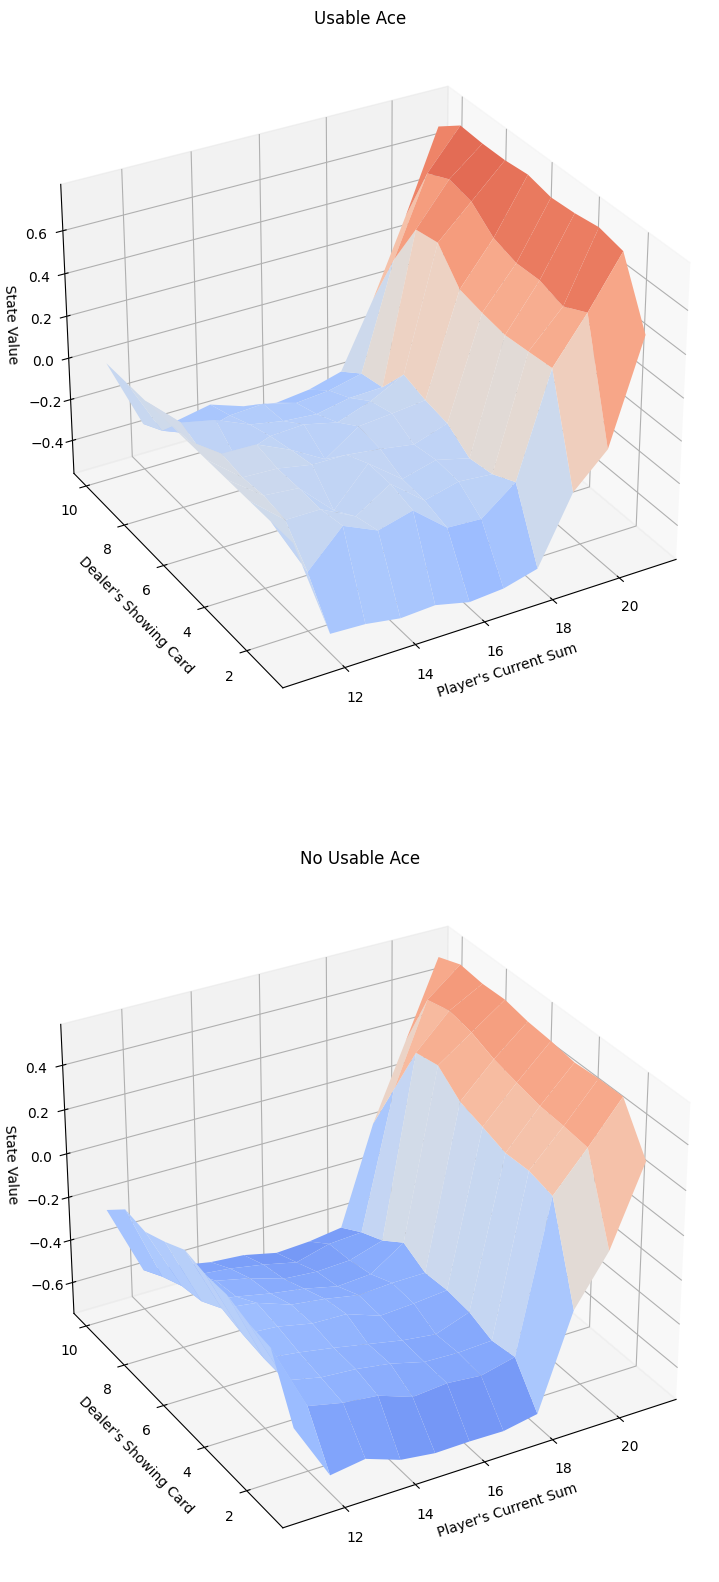

In [15]:
# Get the action-value function
Q = mc_prediction_q(env, 500000, generate_episode_from_limit_stochastic)

# Get the state-value function
V_to_plot = dict((k,(k[0]>18)*(np.dot([0.8, 0.2],v)) + (k[0]<=18)*(np.dot([0.2, 0.8],v))) \
         for k, v in Q.items())

# plot the state-value function
plot_blackjack_values(V_to_plot)

<br>

# 4. MC Control: GLIE

<hr>

In this section, you will write your own implementation of constant-$\alpha$ MC control.  

The pseudocode for (first-visit) GLIE MC control can be found below:

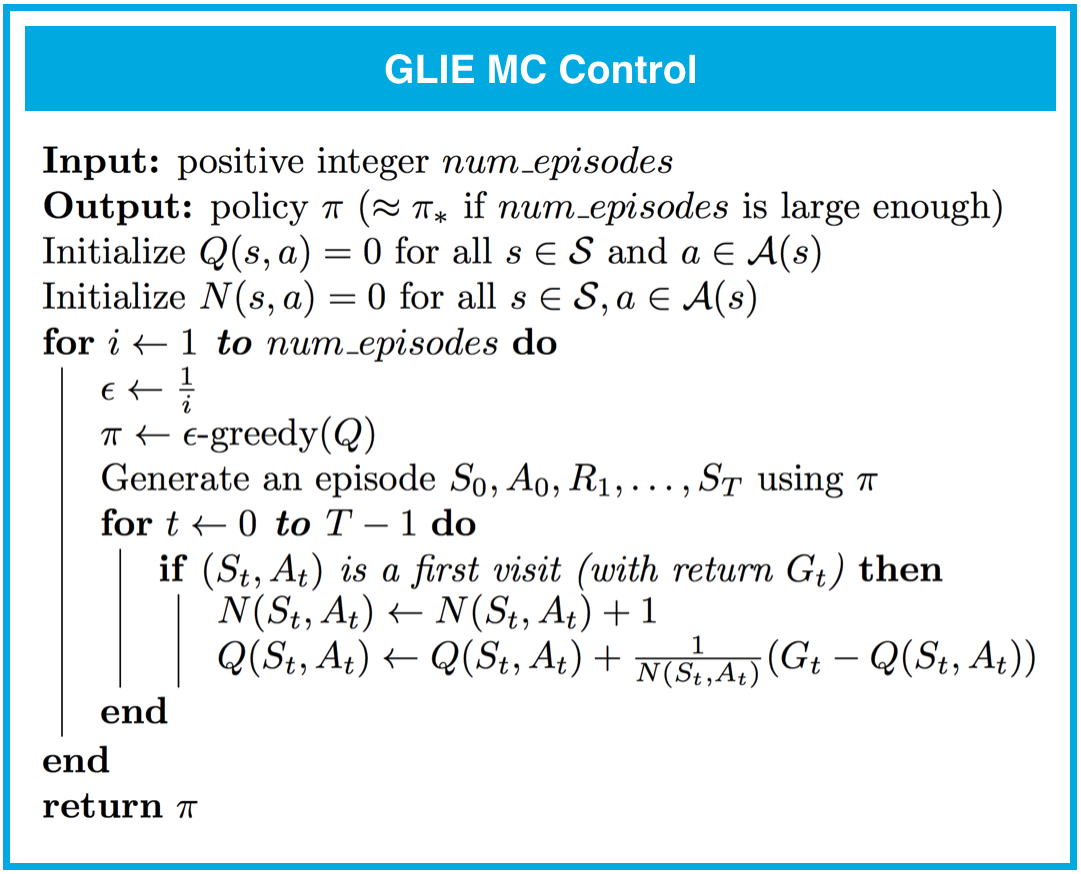

In [16]:
def generate_episode_from_Q(env, Q, epsilon, nA):
    """
    Generates an episode from following the epsilon-greedy policy

    ARGUMENTS
    ------------------
        - env: This is an instance of an OpenAI Gym environment.
        - Q: This is a dictionary (of one-dimensional arrays) where Q[s][a] is the estimated action
             value corresponding to state s and action a.
        - epsilon
        - nA: Number of actions in action space

    RETURNS
    ------------------
        - episode
    """
    # Initialize an empty array for episodes
    episode = []

    # Resets the state of the environment and returns an initial observation
    state = env.reset()

    # Infinite loop
    while True:

        # Action
        action = np.random.choice(np.arange(nA), p=get_probs(Q[state], epsilon, nA)) \
                                    if state in Q else env.action_space.sample()

        # Run one timestep of the environment's dynamics
        next_state, reward, done, info = env.step(action)

        # Append S, A, R to our array
        episode.append((state, action, reward))

        # Update the current state to next state
        state = next_state

        # If done then break the loop
        if done:
            break

    return episode



def get_probs(Q_s, epsilon, nA):
    """
    Obtains the action probabilities corresponding to epsilon-greedy policy

    ARGUMENTS
    ------------------
        - Q_s
        - epsilon
        - nA: Number of actions in action space

    RETURNS
    ------------------
        - policy_s
    """
    # Policy
    policy_s = np.ones(nA) * epsilon / nA

    # Best action
    best_a = np.argmax(Q_s)

    # Update policy
    policy_s[best_a] = 1 - epsilon + (epsilon / nA)

    return policy_s



def update_Q_GLIE(env, episode, Q, N, gamma):
    """
    Updates the action-value function estimate using the most recent episode

    ARGUMENTS
    ------------------
        - env: This is an instance of an OpenAI Gym environment.
        - episode
        - Q: This is a dictionary (of one-dimensional arrays) where Q[s][a] is the estimated action
             value corresponding to state s and action a.
        - N: Number of visits
        - gamma: This is the discount rate. It must be a value between 0 and 1, inclusive.

    RETURNS
    ------------------
        - Q: This is a dictionary (of one-dimensional arrays) where Q[s][a] is the estimated action
             value corresponding to state s and action a.
        - N: Number of visits
    """
    # Get S, A, R
    states, actions, rewards = zip(*episode)

    # Prepare for discounting
    discounts = np.array([gamma**i for i in range(len(rewards)+1)])

    # Iterate through states
    for i, state in enumerate(states):

        # Get the action value
        old_Q = Q[state][actions[i]]

        # Get the number of visits
        old_N = N[state][actions[i]]

        # Update the action value
        Q[state][actions[i]] = old_Q + (sum(rewards[i:]*discounts[:-(1+i)]) - old_Q)/(old_N+1)

        # Update the number of visits
        N[state][actions[i]] += 1

    return Q, N

The function `generate_episode_from_Q` generates an episode from following the epsilon-greedy policy.

The epsilon-greedy policy is a policy that selects the action with the highest estimated Q-value with probability 1 - epsilon, and selects an action at random with probability epsilon.

The function works by first initializing an empty array for the episode. Then, it resets the state of the environment and gets the initial observation.

Next, the function enters an infinite loop. In each iteration of the loop, the function takes the following steps:

1. It chooses an action based on the epsilon-greedy policy. If the state is in the Q dictionary, the function chooses the action with the highest estimated Q-value with probability 1 - epsilon. Otherwise, the function selects an action at random.
2. It takes a step in the environment using the chosen action.
3. It appends the current state, action, and reward to the episode.
4. It updates the current state to the next state.
5. If the episode is done, the function breaks the loop.

Finally, the function returns the episode. \

\





  The function `get_probs` calculates the action probabilities corresponding to the epsilon-greedy policy.

The epsilon-greedy policy is a policy that selects the action with the highest estimated Q-value with probability 1 - epsilon, and selects an action at random with probability epsilon.

The function works by first initializing a policy vector, `policy_s`, to contain all ones, multiplied by epsilon. This means that all actions have equal probability, with a slight bias towards exploration.

Next, the function finds the best action, which is the action with the highest estimated Q-value. Finally, the function updates the policy vector to set the probability of the best action to 1 - epsilon + (epsilon / nA). This ensures that the best action is selected with high probability, but there is still a small chance of exploring other actions. \

\
The function `update_Q_GLIE` updates the action-value function estimate using the most recent episode using the Generalized Least Incremental Estimation (GLIE) algorithm.

The GLIE algorithm works by first getting the states, actions, and rewards from the episode. Then, it prepares for discounting by creating an array of discounts.

Next, the algorithm iterates through the states in the episode. For each state, it gets the action value and the number of visits. Then, it updates the action value using the following formula:

```
Q[state][action] = old_Q + (sum(rewards[i:]*discounts[:-(1+i)]) - old_Q)/(old_N+1)
```

This formula updates the action value towards the expected return of the action, taking into account the discount factor.

Finally, the algorithm updates the number of visits for the state-action pair.

In [17]:
def mc_control_GLIE(env, num_episodes, gamma=1.0):
    """
        ARGUMENTS
    ----------------------
        - env: This is an instance of an OpenAI Gym environment.
        - num_episodes: This is the number of episodes that are generated through agent-environment
                        interaction.
        - gamma: This is the discount rate. It must be a value between 0 and 1, inclusive (default
                 value: 1).

    RETURNS
    ----------------------
        - Q: This is a dictionary (of one-dimensional arrays) where Q[s][a] is the estimated action
             value corresponding to state s and action a.
        - policy: This is a dictionary where policy[s] returns the action that the agent chooses after
                  observing state s.
    """
    # Get number of actions in action space
    nA = env.action_space.n

    # Initialize empty dictionaries of array for action-value function
    Q = defaultdict(lambda: np.zeros(nA))

    # Initialize empty dictionaries of array for number of visits
    N = defaultdict(lambda: np.zeros(nA))

    # Iterate through episodes
    for i_episode in range(1, num_episodes+1):

        # Print the current episode
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()

        # Set the value of epsilon
        epsilon = 1.0/((i_episode/8000)+1)

        # Generate an episode by following epsilon-greedy policy
        episode = generate_episode_from_Q(env, Q, epsilon, nA)

        # Update the action-value function estimate using the episode
        Q, N = update_Q_GLIE(env, episode, Q, N, gamma)

    # Determine the policy corresponding to the final action-value function estimate
    policy = dict((k,np.argmax(v)) for k, v in Q.items())

    return policy, Q

The `mc_control_GLIE` function implements the Monte Carlo control with Generalized Least Incremental Estimation (GLIE) algorithm. The algorithm works as follows:

1. Initialize an empty dictionary of arrays for the Q-value function, `Q`.
2. Initialize an empty dictionary of arrays for the number of visits, `N`.
3. Iterate through episodes:
    * Generate an episode by following the epsilon-greedy policy.
    * Update the Q-value function estimate using the GLIE algorithm.
4. Determine the policy corresponding to the final Q-value function estimate.


Use the cell below to obtain the estimated optimal policy and action-value function.

In [18]:
# Obtain the estimated optimal policy and action-value function
policy_glie, Q_glie = mc_control_GLIE(env, 500000)

Episode 500000/500000.

Next, we plot the corresponding state-value function.

In [19]:
# obtain the state-value function
V_glie = dict((k,np.max(v)) for k, v in Q_glie.items())

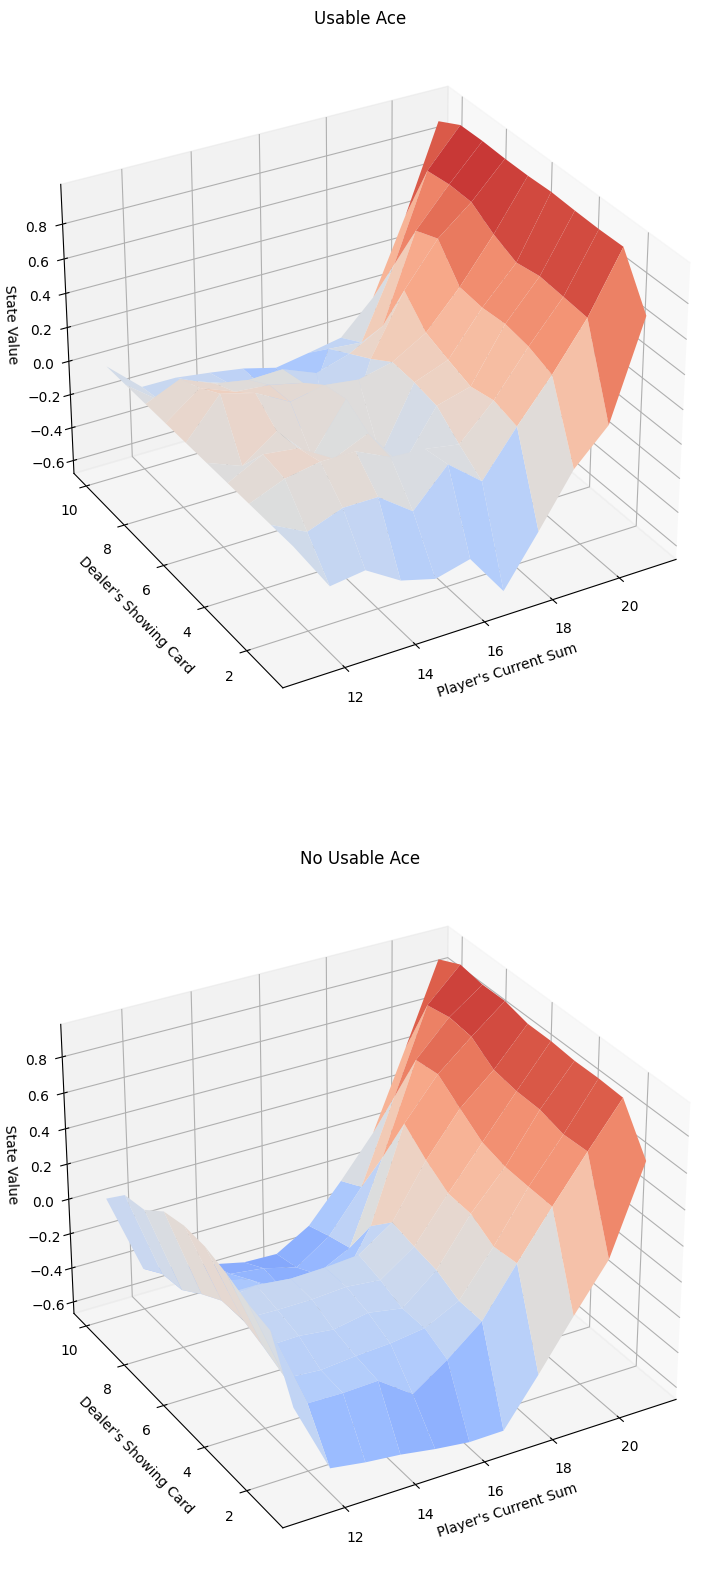

In [20]:
# plot the state-value function
plot_blackjack_values(V_glie)

Finally, we visualize the policy that is estimated to be optimal.

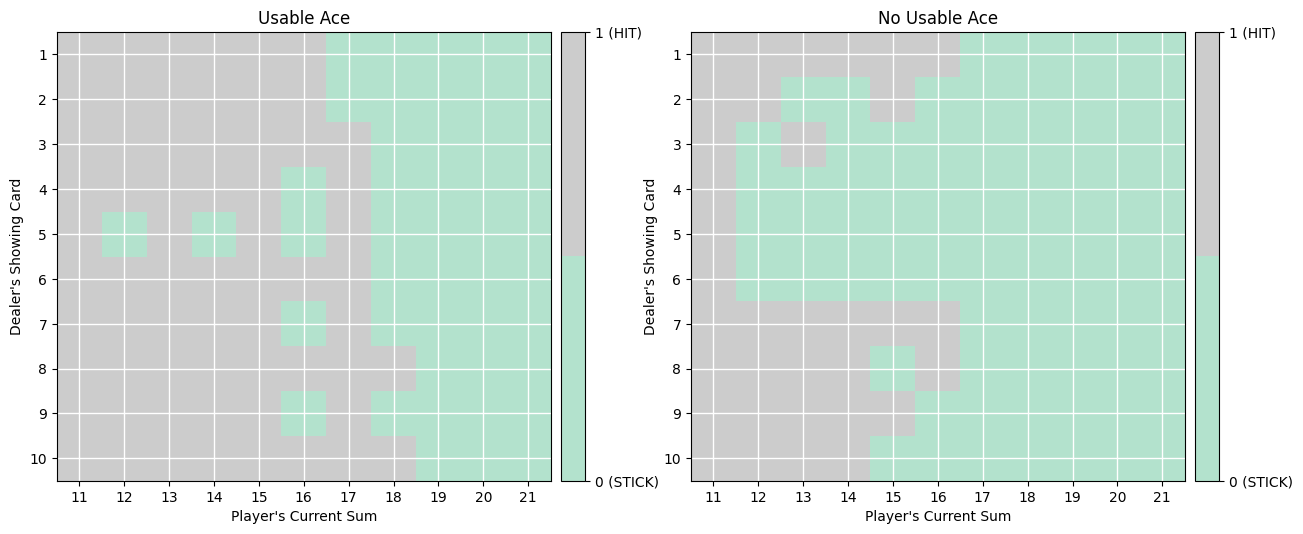

In [21]:

# Plot the policy
def plot_policy(policy):

    def get_Z(x, y, usable_ace):
        if (x,y,usable_ace) in policy:
            return policy[x,y,usable_ace]
        else:
            return 1

    def get_figure(usable_ace, ax):
        x_range = np.arange(11, 22)
        y_range = np.arange(10, 0, -1)
        X, Y = np.meshgrid(x_range, y_range)
        Z = np.array([[get_Z(x,y,usable_ace) for x in x_range] for y in y_range])
        surf = ax.imshow(Z, cmap=plt.get_cmap('Pastel2', 2), vmin=0, vmax=1, extent=[10.5, 21.5, 0.5, 10.5])
        plt.xticks(x_range)
        plt.yticks(y_range)
        plt.gca().invert_yaxis()
        ax.set_xlabel('Player\'s Current Sum')
        ax.set_ylabel('Dealer\'s Showing Card')
        ax.grid(color='w', linestyle='-', linewidth=1)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.1)
        cbar = plt.colorbar(surf, ticks=[0,1], cax=cax)
        cbar.ax.set_yticklabels(['0 (STICK)','1 (HIT)'])

    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(121)
    ax.set_title('Usable Ace')
    get_figure(True, ax)
    ax = fig.add_subplot(122)
    ax.set_title('No Usable Ace')
    get_figure(False, ax)
    plt.show()
plot_policy(policy_glie)

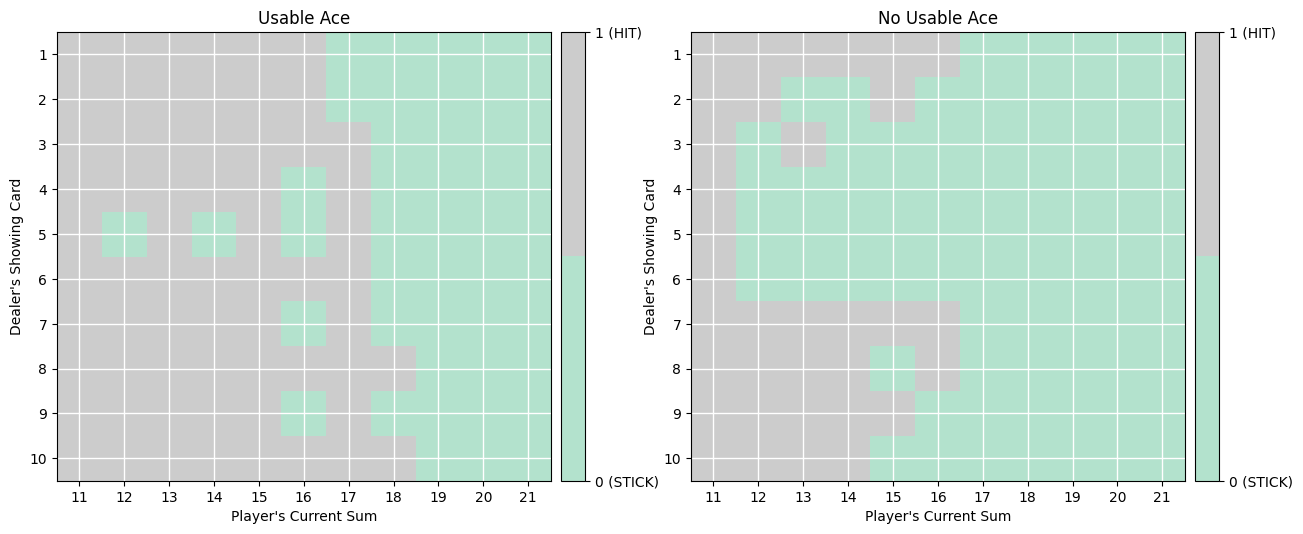

In [22]:
plot_policy(policy_glie)

### Please answer the questions below to complete the experiment:


In [23]:
# @title  In Monte Carlo prediction, what is meant by the first-visit approach? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "It considers the first time a state is visited during an episode and updates its value." #@param ["","It updates the value of all states at every visit during an episode.", "It only updates the value of states that are visited multiple times within an episode.", "It considers the first time a state is visited during an episode and updates its value.", "It ignores the initial visit and updates the value only after multiple visits."]

In [24]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [25]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "good and challenging" #@param {type:"string"}


In [26]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [27]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [28]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [29]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 877
Date of submission:  25 May 2024
Time of submission:  16:55:12
View your submissions: https://aias-iisc.talentsprint.com/notebook_submissions
